In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [2]:
#a little data preprocessing

train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

# convert to numpy rep for keras
x_train = train.values
x_test = test.values 
y_train = y_train.values
y_test = y_test.values 

# normalization and change to gray scale
x_train = x_train/255
x_test = x_test/255

# reshape 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)


(27455,)
(7172,)
(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [3]:
# find all unique labels: data for 9(J) and 25(Z) are missing
labels = np.array(np.unique(y_test))
numLabels = 24
print(labels)

# one hot encode the labels 
# for train set
ohe_labels_train = np.zeros((len(y_train), numLabels))
for i in range (len(y_train)):
    ohe_labels_train[i] = np.where(labels == y_train[i], 1, 0)

# for test set
ohe_labels_test = np.zeros((len(y_test), numLabels))
for i in range (len(y_test)):
    ohe_labels_test[i] = np.where(labels == y_test[i], 1, 0)



[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


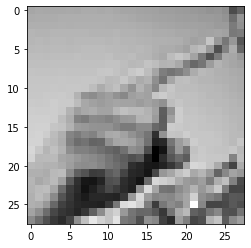

In [4]:
#plot an image 
plt.imshow(x_train[1], cmap = 'gray')

In [5]:
# convolutional model
model = Sequential()
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(24, activation='softmax'))


# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 dropout (Dropout)           (None, 28, 28, 25)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 25)        5650      
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 25)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 25)         0         
 2D)                                                    

In [6]:
training = model.fit(x_train, ohe_labels_train, validation_split=0.2, epochs=150) 

Epoch 1/250
687/687 [==============================] - 22s 31ms/step - loss: 1.2228 - accuracy: 0.6702 - val_loss: 0.5722 - val_accuracy: 0.9135
Epoch 2/250
687/687 [==============================] - 21s 31ms/step - loss: 0.1734 - accuracy: 0.9643 - val_loss: 0.1647 - val_accuracy: 0.9867
Epoch 3/250
687/687 [==============================] - 22s 33ms/step - loss: 0.0658 - accuracy: 0.9877 - val_loss: 0.0713 - val_accuracy: 0.9975
Epoch 4/250
687/687 [==============================] - 22s 32ms/step - loss: 0.0454 - accuracy: 0.9896 - val_loss: 0.1228 - val_accuracy: 0.9761
Epoch 5/250
687/687 [==============================] - 24s 35ms/step - loss: 0.0337 - accuracy: 0.9919 - val_loss: 0.0416 - val_accuracy: 0.9976
Epoch 6/250
687/687 [==============================] - 19s 28ms/step - loss: 0.0249 - accuracy: 0.9939 - val_loss: 0.0204 - val_accuracy: 0.9985
Epoch 7/250
687/687 [==============================] - 20s 29ms/step - loss: 0.0236 - accuracy: 0.9944 - val_loss: 0.0220 - val_ac

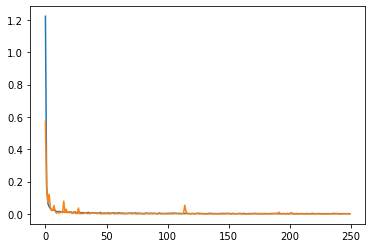

In [7]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()

In [9]:
score = model.evaluate(x_test, ohe_labels_test)
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 6ms/step - loss: 0.1452 - accuracy: 0.9706
Test accuracy: 0.9705800414085388
